In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [ ]:
from fastai.vision import *

In [ ]:
path="direccion"
np.random.seed(5)
data = ImageDataBunch.from_folder(path+'.',
                                  train=path+'.',
                                  valid_pct=0.3,
                                  ds_tfms=get_transforms(do_flip = True , flip_vert = True),
                                  size=100).normalize(imagenet_stats)

In [ ]:
data.classes

['Bueno', 'Malo']

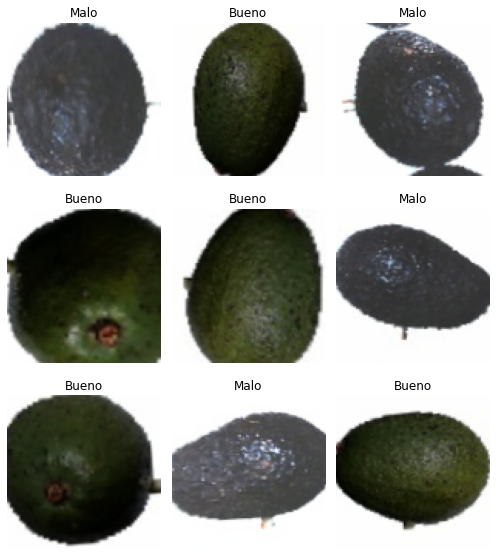

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))

In [ ]:
from fastai.metrics import error_rate
learn = cnn_learner(data, models.resnet18, metrics=accuracy,model_dir="/tmp/model/")

In [ ]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
#learn.fit_one_cycle(1)

In [ ]:
#Aprendizaje de un ciclo
#learn.recorder.plot_lr ()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


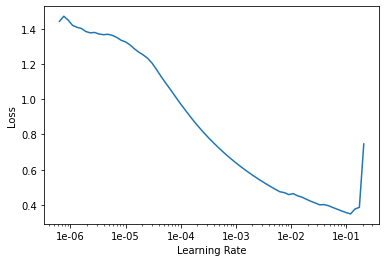

In [ ]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:

#lr = 0.001
lr_min = 1e-6
lr_max = 1e-4
#learn.fit_one_cycle(3)
learn.fit_one_cycle(3,slice(lr_min,lr_max))
#learn.fit_one_cycle(5, slice(lr))

#learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.118389,1.242734,0.442177,00:02
1,0.900248,0.338477,0.857143,00:01
2,0.722525,0.179696,0.979592,00:01


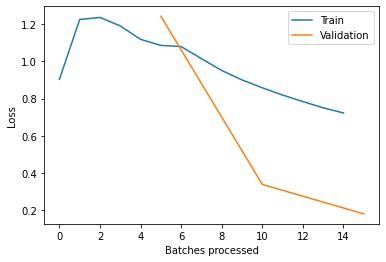

In [ ]:
learn.recorder.plot_losses()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

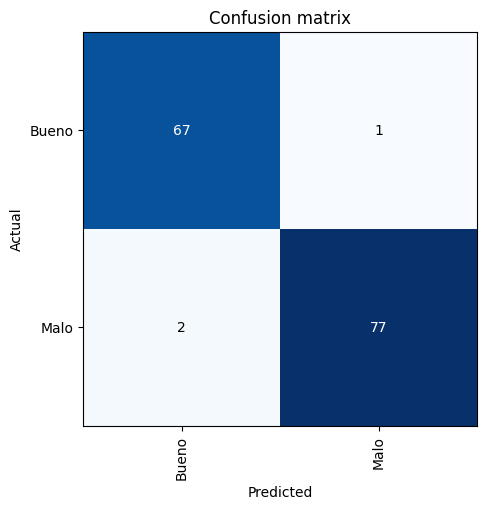

In [ ]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [ ]:
learn.export("//export.pkl")